<a href="https://colab.research.google.com/github/LeninGF/CoursesNotes/blob/main/YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Paso 1: Clonar el repositorio de YOLOv5 de ultralytics y configurar dependencias
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [2]:
# Paso 2: Importar las librerías necesarias
import torch
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from PIL import Image
from IPython.display import display

In [13]:
# Paso 3: Descargar una imagen de prueba
# !curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg -o zidane.jpg
!curl -L https://static1.cbrimages.com/wordpress/wp-content/uploads/2018/05/agent-smith-and-clones.jpg -o smith.jpg
img_path = Path('smith.jpg')  # Definimos la ruta de la imagen de prueba
# img_path = Path('neo.jpg')  # Definimos la ruta de la imagen de prueba

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65347  100 65347    0     0  89327      0 --:--:-- --:--:-- --:--:-- 89393


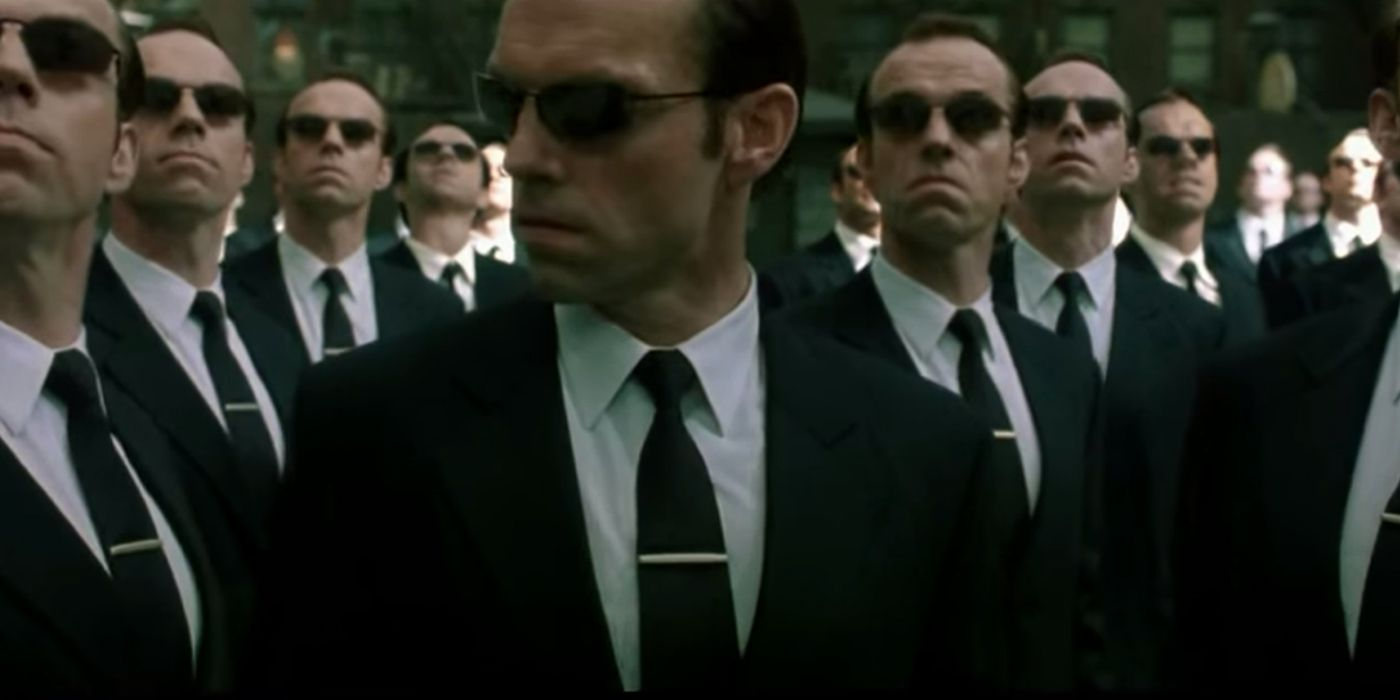

In [14]:
# Mostrar la imagen zidane.jpg antes de aplicar YOLO usando PIL e IPython.display
original_image = Image.open(img_path)
display(original_image)  # Mostrar la imagen directamente en el notebook

In [15]:
# Paso 4: Cargar el modelo YOLOv5 preentrenado
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [16]:
# Paso 5: Realizar la detección de objetos
results = model(str(img_path))  # Convertimos la ruta a string para asegurar compatibilidad

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [17]:
# Paso 6: Obtener los resultados de detección (clases y ubicaciones)
detections = results.pandas().xyxy[0]
print("Resultados de detección (clases y ubicaciones):")
print(detections)

Resultados de detección (clases y ubicaciones):
           xmin        ymin         xmax        ymax  confidence  class  \
0    631.565857  357.904114   737.717529  697.969849    0.885451     27   
1    311.458832  265.949768   360.258942  356.500916    0.813515     27   
2    444.299255  259.799225   473.989319  311.638947    0.772891     27   
3    367.993378  120.020447   535.488281  318.351471    0.730953      0   
4     18.953638    5.791221   301.178802  689.247925    0.725715      0   
5    187.392624  294.853119   282.524292  484.384094    0.710168     27   
6    945.807678  307.619049  1032.755249  516.288330    0.688653     27   
7   1172.132935  128.403473  1400.000000  694.479736    0.656521      0   
8    232.905563   72.653397   404.783142  362.420288    0.640548      0   
9   1048.064575  273.229126  1095.684937  354.435791    0.630683     27   
10  1258.312988  131.235214  1387.655151  321.905090    0.609793      0   
11  1117.093018   91.950142  1277.918091  350.747742

In [18]:
# Paso 7: Guardar y cargar la imagen procesada para visualizarla
results.save()  # Guarda la imagen procesada en la carpeta `runs/detect/exp`

Saved 1 image to runs/detect/exp6


In [20]:
processed_image_path = list(Path('runs/detect/exp6').glob('*.jpg'))
processed_image_path

[PosixPath('runs/detect/exp6/smith.jpg')]

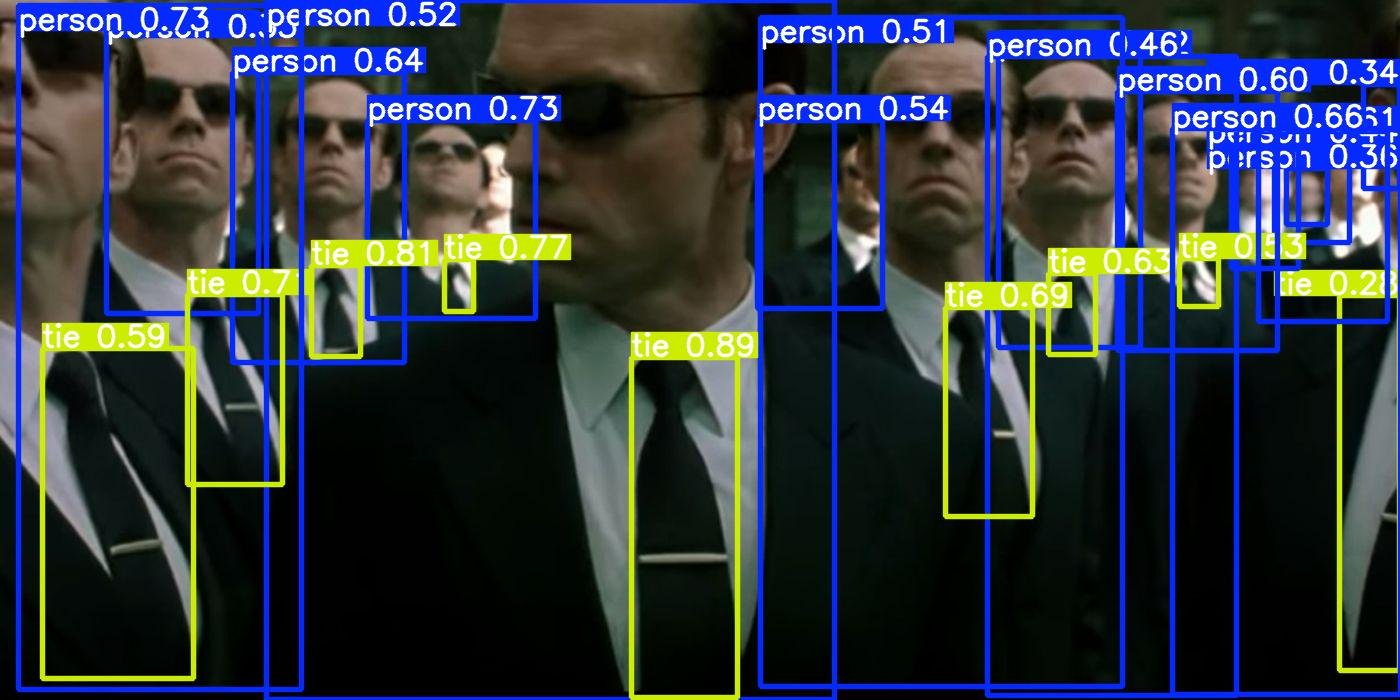

In [22]:
# Cargar la imagen procesada y mostrarla en el notebook
processed_image_path = list(Path('runs/detect/exp6').glob('*.jpg'))[0]  # Selecciona la primera imagen en el directorio
processed_image = Image.open(processed_image_path)
display(processed_image)  # Mostrar la imagen procesada con detecciones